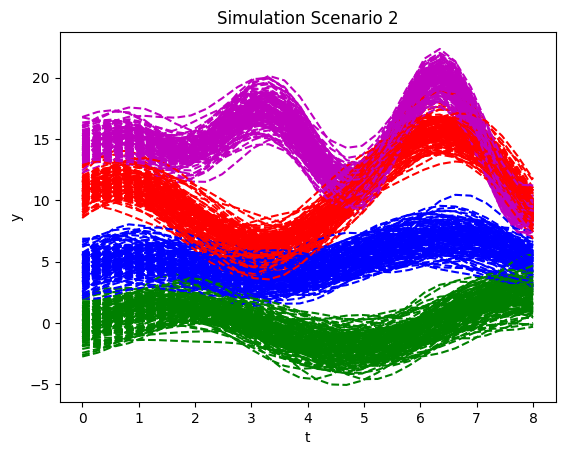

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import spatial, interpolate
from ensemble_clustering import functional_data_decomposition, functional_data_clustering
from fda_results import percentage_variation_ami_ari, plot_percentage_variation_ami_ari

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

# Sample from the Gaussian process distribution
nb_of_samples = 30  # Number of points in each function
# Independent variable samples
t = np.expand_dims(np.linspace(0, 8, nb_of_samples), 1)
Σ = exponentiated_quadratic(t, t)  # Kernel of data points

# Create different curves
mean_curve = np.zeros((4, len(t)))
mean_curve[0] = np.reshape(np.sin(t)*np.log(t+2), (nb_of_samples))
mean_curve[1] = np.reshape(np.cos(t)*np.log(t+0.5), (nb_of_samples))
mean_curve[2] = np.reshape(np.cos(t)*(np.sqrt(5*t+0.5)), (nb_of_samples))
mean_curve[3] = np.reshape(np.cos(2*t)*np.log(t+0.5)*(np.sqrt(t+0.5)), (nb_of_samples))

mixture_k = [1/4, 1/4, 1/4, 1/4	]
n = 500
Y = np.zeros((n, len(t)))
simulation_label = np.zeros(n)

for i in range(n):
    # generate a random number between 0 and 1
    r = np.random.rand()
    # find the index of the mixture component
    if r < mixture_k[0]:
        # draw for the first component
        ys = np.random.multivariate_normal(
        mean=mean_curve[0], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='g')
        # Remember the label of the component
        simulation_label[i] = 0

    elif r < mixture_k[0] + mixture_k[1]:
        # draw for the second component
        # draw for the first component
        ys = 5 + np.random.multivariate_normal(
        mean=mean_curve[1], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='b')
        # Remember the label of the component
        simulation_label[i] = 1

    
    elif r < mixture_k[0] + mixture_k[1] + mixture_k[2]:
        # draw for the first component
        ys = 10 + np.random.multivariate_normal(
        mean=mean_curve[2], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='r')
        # Remember the label of the component
        simulation_label[i] = 2

    else:
        # draw for the first component
        ys = 15 + np.random.multivariate_normal(
        mean=mean_curve[3], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='m')
        # Remember the label of the component
        simulation_label[i] = 3

plt.title('Simulation Scenario 2')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

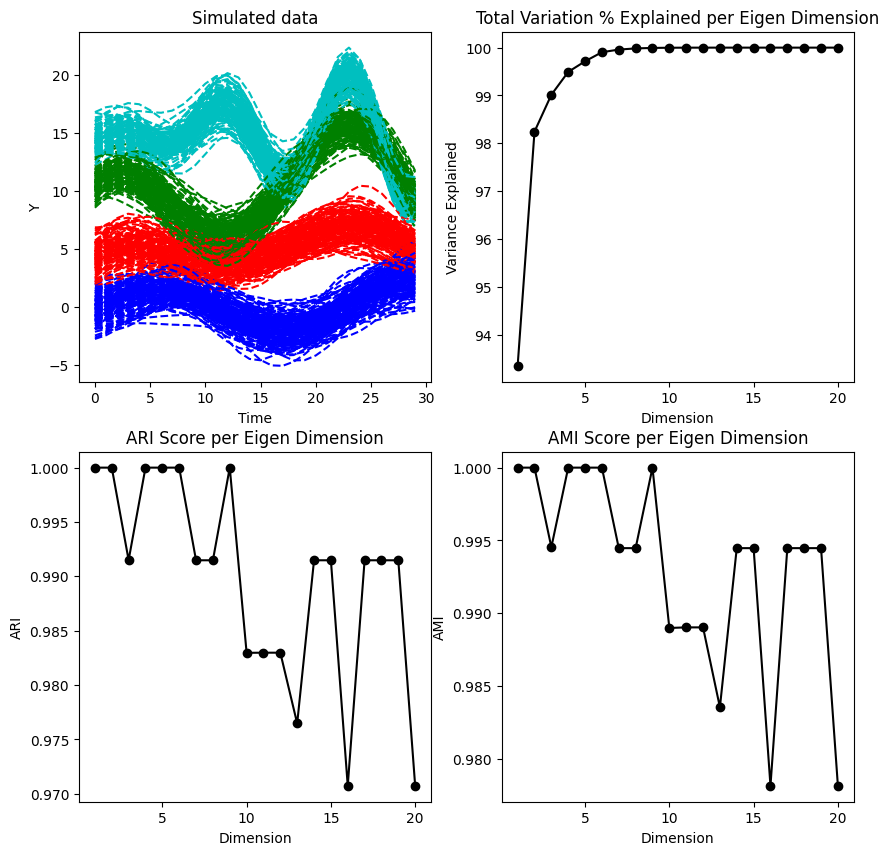

In [39]:
variance, ami, ari, v_range = percentage_variation_ami_ari(20, Y, 150, simulation_label, 4)
plot_percentage_variation_ami_ari(variance, ami, ari, v_range, simulation_label, Y)

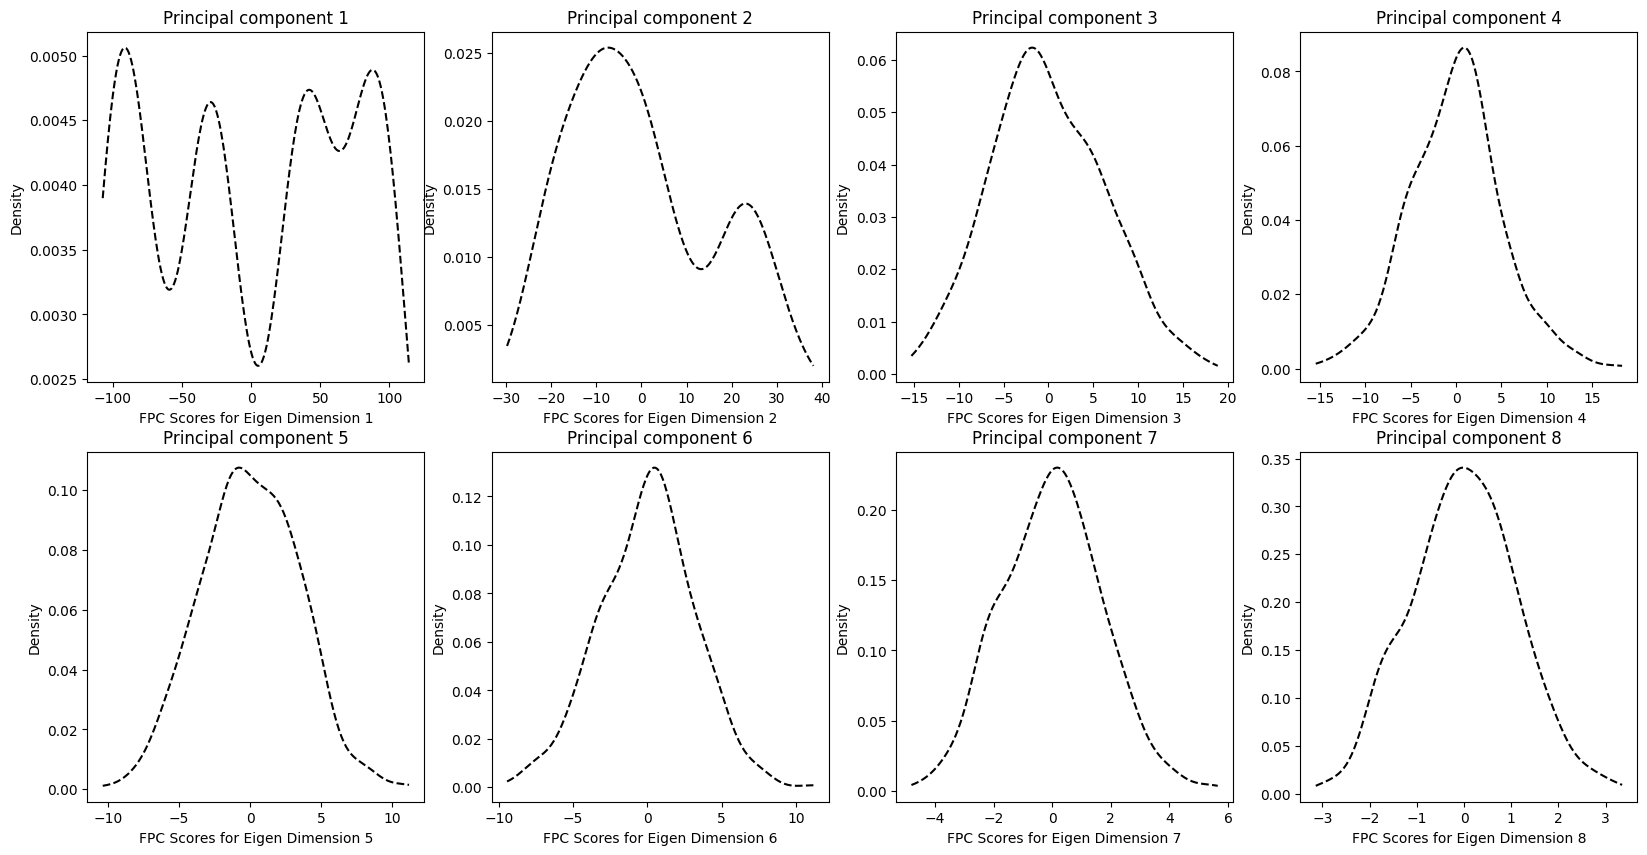

In [40]:
data_smooth, mean, principal_componenets, eigen_functions = functional_data_decomposition (Y, 10, 150)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
x = 0
for i in range(8):
        # Kernel density plot for principal components[i], as a scatter plot
        # Determine the desnity of principal components[i]
        kde = scipy.stats.gaussian_kde(principal_componenets[:,i])
        # Create a grid of points
        x_grid = np.linspace(min(principal_componenets[:,i]), max(principal_componenets[:,i]), 250)
        # Evaluate the density on the grid
        density = kde(x_grid)
        # Plot the density
        ax[x, i%4].plot(x_grid, density, linestyle='--', color='k')
        ax[x, i%4].set_title('Principal component ' + str(i+1))
        ax[x, i%4].set_xlabel('FPC Scores for Eigen Dimension ' + str(i+1))
        ax[x, i%4].set_ylabel('Density')
        if i%4 == 3:
                x = 1

plt.show()

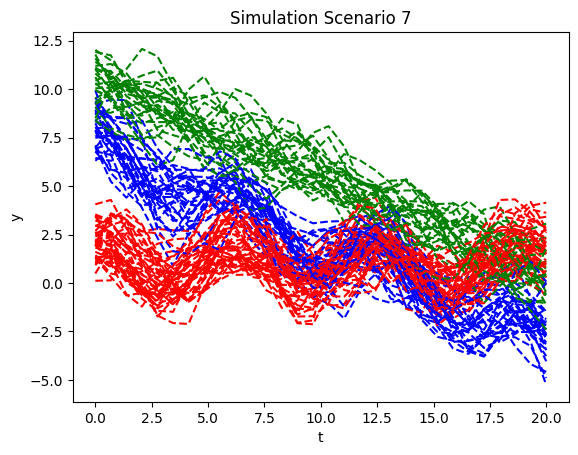

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import spatial, interpolate
from ensemble_clustering import functional_data_decomposition, functional_data_clustering
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score
from fda_results import percentage_variation_ami_ari, plot_percentage_variation_ami_ari

# Ignore convergence warnings
import warnings
warnings.filterwarnings("ignore")

# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

# Sample from the Gaussian process distribution
nb_of_samples = 30  # Number of points in each function
# Independent variable samples
t = np.expand_dims(np.linspace(0, 20, nb_of_samples), 1)
Σ = exponentiated_quadratic(t, t)  # Kernel of data points

# Declare the mean curve
mean_curve = np.zeros((3, len(t)))
# Mean curve with white noise
mean_curve[0] = np.reshape(np.cos(t), (nb_of_samples))
mean_curve[1] = np.reshape(np.cos(t) -0.5*t, (nb_of_samples))
mean_curve[2] = np.reshape(-0.5*t+0.5, (nb_of_samples))

mixture_k = [1/2, 1/4, 1/4]
n = 100
Y = np.zeros((n, len(t)))
simulation_label = np.zeros(n)

for i in range(n):
    # generate a random number between 0 and 1
    r = np.random.rand()
    # find the index of the mixture component
    if r < mixture_k[0]:
        # draw for the first component
        ys = 1 + np.random.multivariate_normal(mean= mean_curve[0], cov=Σ, size=1) + np.random.normal(0, 0.2, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='r')
        # Remember the label of the component
        simulation_label[i] = 0
    elif r < mixture_k[0] + mixture_k[1]:
        # draw for the first component
        ys = 5+ 2 + np.random.multivariate_normal(mean= mean_curve[1], cov=Σ, size=1) + np.random.normal(0, 0.2, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='b')
        # Remember the label of the component
        simulation_label[i] = 1
    else:
        # draw for the first component
        ys = 10 + np.random.multivariate_normal(mean= mean_curve[2], cov=Σ, size=1) + np.random.normal(0, 0.2, len(t))
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='g')
        # Remember the label of the component
        simulation_label[i] = 2

plt.title('Simulation Scenario 7')
plt.xlabel('t')
plt.ylabel('y')
plt.show()


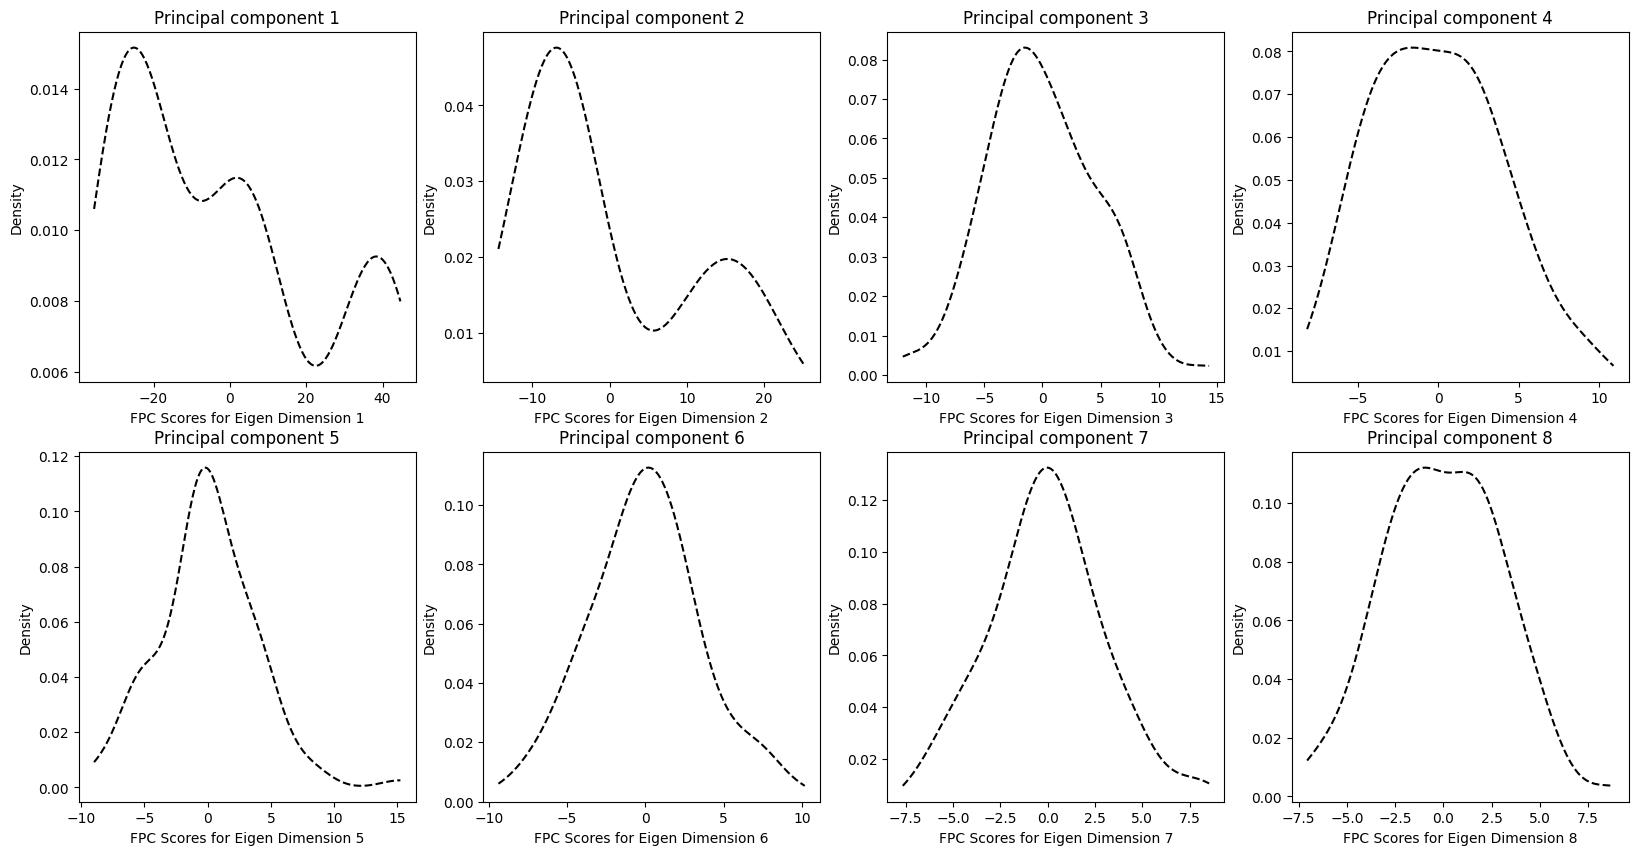

In [47]:
data_smooth, mean, principal_componenets, eigen_functions = functional_data_decomposition (Y, 10, 150)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
x = 0
for i in range(8):
        # Kernel density plot for principal components[i], as a scatter plot
        # Determine the desnity of principal components[i]
        kde = scipy.stats.gaussian_kde(principal_componenets[:,i])
        # Create a grid of points
        x_grid = np.linspace(min(principal_componenets[:,i]), max(principal_componenets[:,i]), 250)
        # Evaluate the density on the grid
        density = kde(x_grid)
        # Plot the density
        ax[x, i%4].plot(x_grid, density, linestyle='--', color='k')
        ax[x, i%4].set_title('Principal component ' + str(i+1))
        ax[x, i%4].set_xlabel('FPC Scores for Eigen Dimension ' + str(i+1))
        ax[x, i%4].set_ylabel('Density')
        if i%4 == 3:
                x = 1

plt.show()

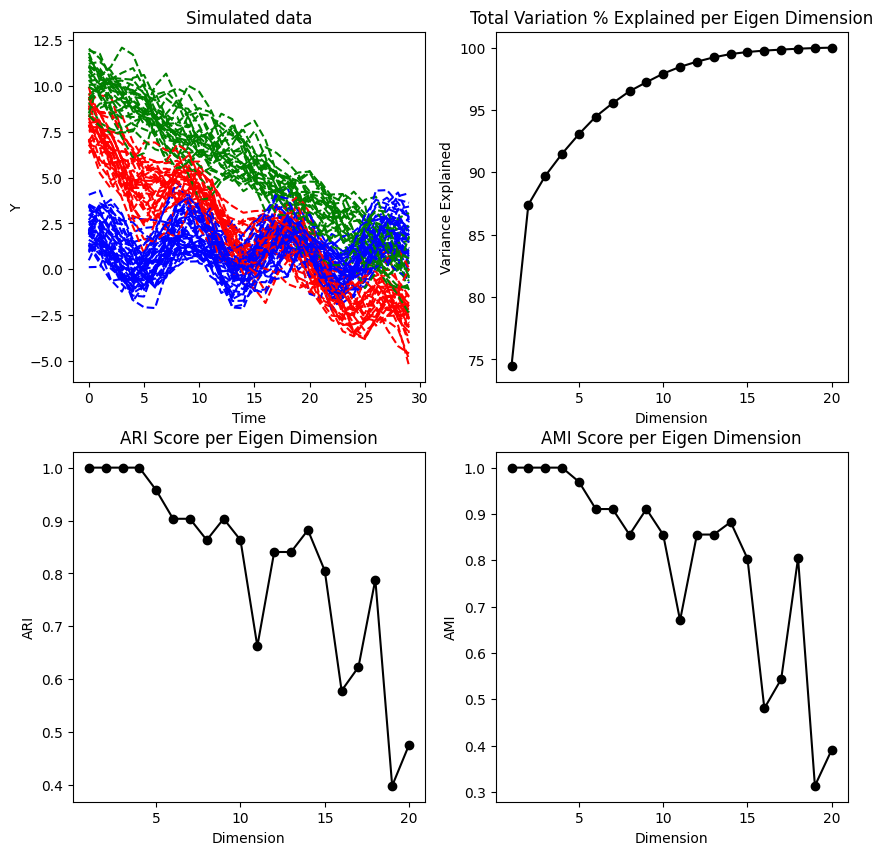

In [46]:
variance, ami, ari, v_range = percentage_variation_ami_ari(20, Y, 150, simulation_label, 3)
plot_percentage_variation_ami_ari(variance, ami, ari, v_range, simulation_label, Y)